 <p style="color:blue;font-size:80px;">Corso Tecnico e tecloogie AI</p>

In [9]:
'''
 RETE NEURALE MACHINE LEARNING
'''

'\n RETE NEURALE MACHINE LEARNING\n'

In [4]:
# %% [markdown]
# # Esempio di Forward Pass + Retropropagation
# Due neuroni, 4 input, sigmoid, MSE con 1/2

# %%
import random as rd
import math

# Funzione sigmoid e derivata (sull'output)
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_deriv(out):
    return out * (1 - out)  # out = output della sigmoid

# %%
# Parametri iniziali
x = [50/100, 20/100, 30/100, 60/100]  # input normalizzati
target = [0.1, 0.4]  # target per i due neuroni
lr = 0.5  # learning rate
epoche = 5  # numero di epoche

# Pesi iniziali tra -0.5 e 0.5
pesi = [[rd.uniform(-0.5, 0.5) for _ in range(4)] for _ in range(2)]
bias = 0.0

# %%
# Training
for epoca in range(epoche):
    # --- FORWARD ---
    outputs = []
    for neurone in range(2):
        z = sum(pesi[neurone][i] * x[i] for i in range(4)) + bias
        out = sigmoid(z)
        outputs.append(out)
    
    # Calcolo errore MSE con 1/2
    mse = sum(0.5 * (outputs[i] - target[i])**2 for i in range(2))
    
    # --- BACKPROP ---
    deltas = [(outputs[i] - target[i]) * sigmoid_deriv(outputs[i]) for i in range(2)]
    
    # Aggiornamento pesi
    for neurone in range(2):
        for i in range(4):
            pesi[neurone][i] -= lr * deltas[neurone] * x[i]
    
    # Aggiornamento bias (condiviso)
    bias -= lr * sum(deltas)
    
    # Stampa epoca
    print(f"Epoca {epoca+1}")
    print(f" Output: {outputs}")
    print(f" MSE: {mse:.6f}")
    print(f" Delta: {deltas}")
    print(f" Bias: {bias:.6f}")
    print("-"*40)




Epoca 1
 Output: [0.5592968865807635, 0.4865729906636772]
 MSE: 0.109224
 Delta: [0.11320927832812051, 0.02162763989068259]
 Bias: -0.067418
----------------------------------------
Epoca 2
 Output: [0.5322061250255858, 0.4677593856786339]
 MSE: 0.095697
 Delta: [0.10760323215709214, 0.01686941343754638]
 Bias: -0.129655
----------------------------------------
Epoca 3
 Output: [0.5067379890416099, 0.4507552496483663]
 MSE: 0.084006
 Delta: [0.10166603115382583, 0.012565728625518115]
 Bias: -0.186771
----------------------------------------
Epoca 4
 Output: [0.48306180305627183, 0.4355149330866334]
 MSE: 0.073999
 Delta: [0.09565554936910078, 0.008731050678201815]
 Bias: -0.238964
----------------------------------------
Epoca 5
 Output: [0.46123679710894483, 0.4219414421095202]
 MSE: 0.065487
 Delta: [0.08976640995992685, 0.005351668282595956]
 Bias: -0.286523
----------------------------------------


Matplotlib is building the font cache; this may take a moment.


Epoca 10 - MSE: 0.029027 - Output: [0.340849028495502, 0.39330189304840324]
Epoca 20 - MSE: 0.015162 - Output: [0.26843348164888015, 0.35579213912332475]
Epoca 30 - MSE: 0.010279 - Output: [0.2328275014427582, 0.3460015770239031]
Epoca 40 - MSE: 0.007671 - Output: [0.21157991373727486, 0.3462206112105799]
Epoca 50 - MSE: 0.005952 - Output: [0.19708975511008042, 0.35023434744494647]


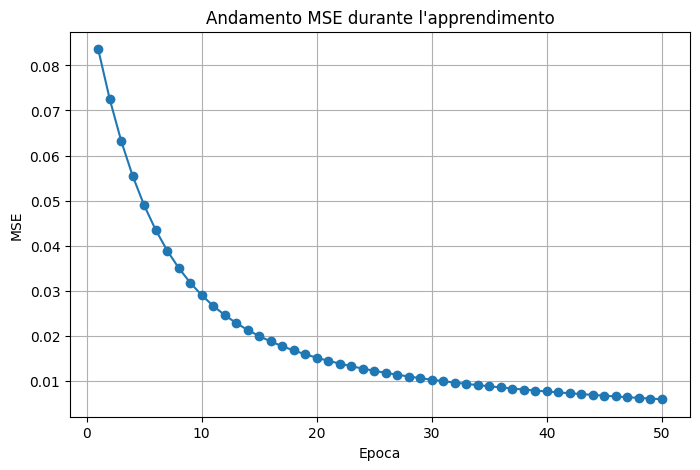

In [5]:
# %% [markdown]
# # Esempio di Forward Pass + Retropropagation con Grafico MSE
# Due neuroni, 4 input, sigmoid, MSE con 1/2

# %%
import random as rd
import math
import matplotlib.pyplot as plt

# Funzione sigmoid e derivata
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_deriv(out):
    return out * (1 - out)  # out = output della sigmoid

# %%
# Parametri iniziali
x = [50/100, 20/100, 30/100, 60/100]  # input normalizzati
target = [0.1, 0.4]  # target per i due neuroni
lr = 0.5  # learning rate
epoche = 50  # numero di epoche

# Pesi iniziali tra -0.5 e 0.5
pesi = [[rd.uniform(-0.5, 0.5) for _ in range(4)] for _ in range(2)]
bias = 0.0

# Lista per salvare MSE
mse_list = []

# %%
# Training
for epoca in range(epoche):
    # --- FORWARD ---
    outputs = []
    for neurone in range(2):
        z = sum(pesi[neurone][i] * x[i] for i in range(4)) + bias
        out = sigmoid(z)
        outputs.append(out)
    
    # Calcolo errore MSE con 1/2
    mse = sum(0.5 * (outputs[i] - target[i])**2 for i in range(2))
    mse_list.append(mse)
    
    # --- BACKPROP ---
    deltas = [(outputs[i] - target[i]) * sigmoid_deriv(outputs[i]) for i in range(2)]
    
    # Aggiornamento pesi
    for neurone in range(2):
        for i in range(4):
            pesi[neurone][i] -= lr * deltas[neurone] * x[i]
    
    # Aggiornamento bias
    bias -= lr * sum(deltas)
    
    # Stampa ogni 10 epoche
    if (epoca+1) % 10 == 0:
        print(f"Epoca {epoca+1} - MSE: {mse:.6f} - Output: {outputs}")

# %%
# Grafico MSE
plt.figure(figsize=(8,5))
plt.plot(range(1, epoche+1), mse_list, marker='o')
plt.title("Andamento MSE durante l'apprendimento")
plt.xlabel("Epoca")
plt.ylabel("MSE")
plt.grid(True)
plt.show()


/home/utente/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuratezza: 1.00


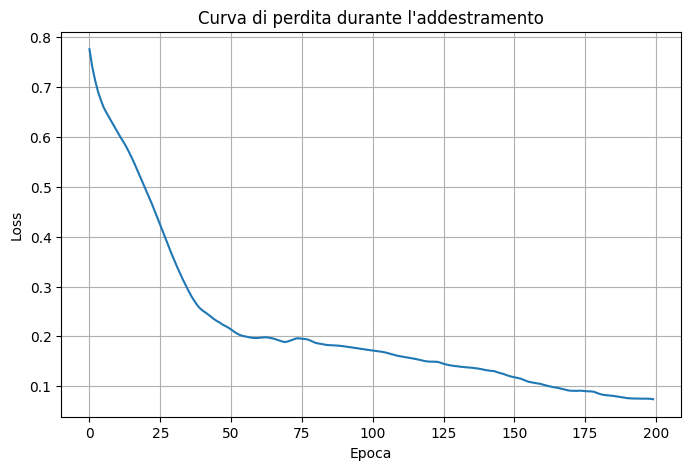

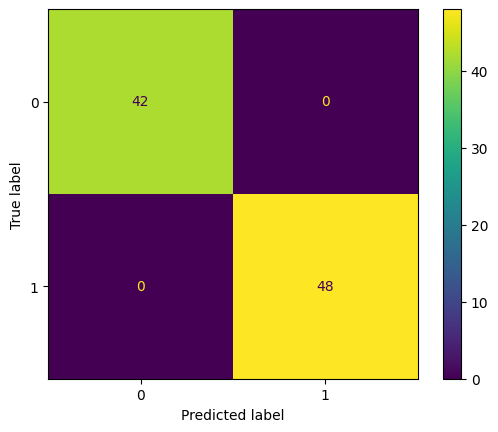

In [8]:
# %% [markdown]
# # Classificazione con Scikit-Learn (MLPClassifier)

# %%
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Creazione dataset di esempio (2 classi)
X, y = make_classification(
    n_samples=300,   # numero di campioni
    n_features=4,    # numero di features
    n_classes=2,     # due classi
    n_informative=2, # due features utili
    n_redundant=0,   # nessuna ridondanza
    random_state=42
)

# Divisione in train e test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Creazione e addestramento MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(5, 5),   # due hidden layer da 5 neuroni ciascuno
    activation='relu',           # funzione di attivazione
    solver='adam',               # ottimizzatore
    learning_rate_init=0.01,     # learning rate
    max_iter=200,                # epoche
    random_state=42
)
mlp.fit(X_train, y_train)

# Predizione
y_pred = mlp.predict(X_test)

# Accuratezza
acc = accuracy_score(y_test, y_pred)
print(f"Accuratezza: {acc:.2f}")

# Grafico della curva di perdita
plt.figure(figsize=(8,5))
plt.plot(mlp.loss_curve_)
plt.title("Curva di perdita durante l'addestramento")
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Matrice di confusione
ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)
plt.show()
